In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Importing Data

df = pd.read_csv(r'C:\Users\Arjun\Downloads\Banknote.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

[]

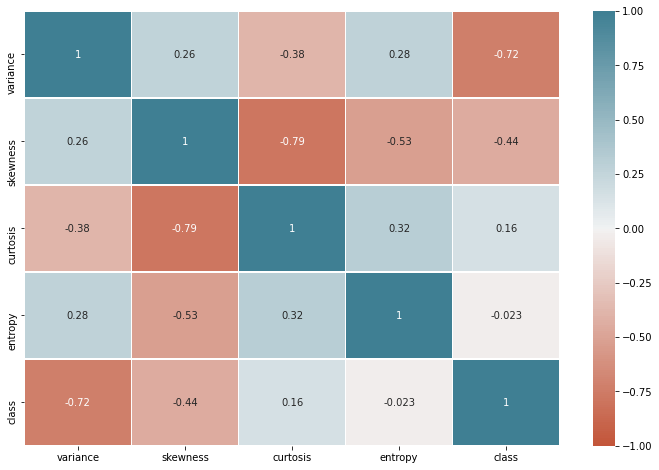

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr()
plt.figure(figsize = (12,8))

a = sns.heatmap(corr ,vmin = -1 , vmax = 1 ,linewidth = 0.5,
                    cmap=sns.diverging_palette(20, 220, n=200),
                   annot = True)
a.plot()


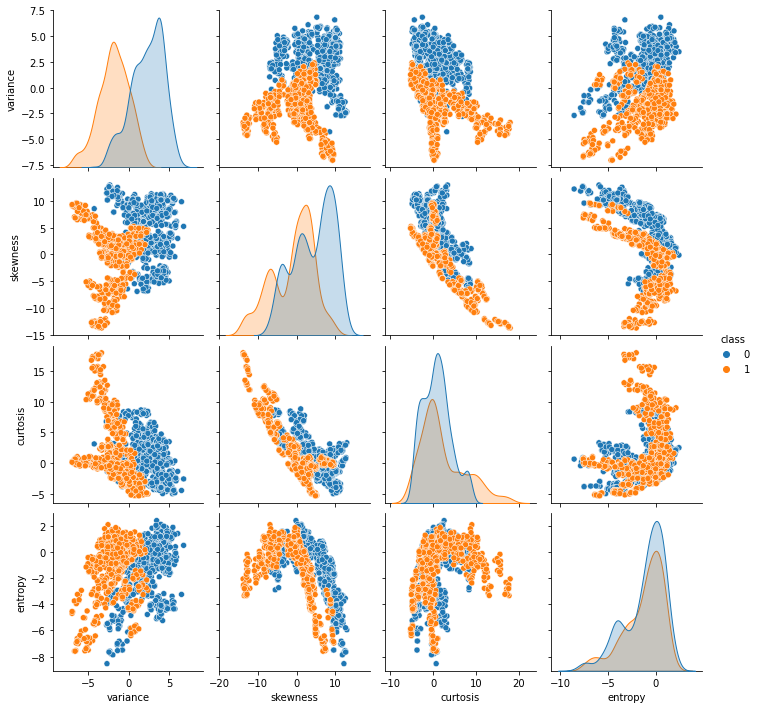

In [9]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(df,hue='class')

variance        AxesSubplot(0.125,0.71587;0.227941x0.16413)
skewness     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
curtosis     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
entropy        AxesSubplot(0.125,0.518913;0.227941x0.16413)
class       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
dtype: object

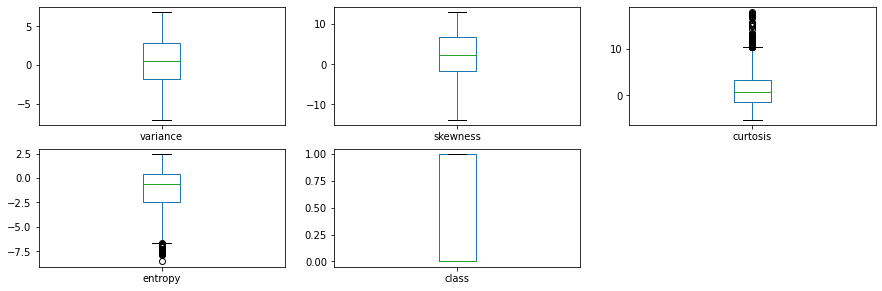

In [10]:
df.plot(kind = 'box', subplots = True , figsize = (15,10), layout = (4,3))

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# st_x=MinMaxScaler()
# X_train=st_x.fit_transform(X_train)
# X_test=st_x.transform(X_test)

In [12]:
x , y = df.drop('class',axis=1) , df['class']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
print("x train shape ", x_train.shape)
print("x test shape ", x_test.shape)

x train shape  (1097, 4)
x test shape  (275, 4)


## Linear SVM

In [14]:
from sklearn.svm import SVC
linear_svc_classifier = SVC(kernel="linear")
linear_svc_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [15]:
# prediction
linear_svc_classifier_prediction = linear_svc_classifier.predict(x_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(confusion_matrix(y_test, linear_svc_classifier_prediction))

[[152   1]
 [  0 122]]


In [18]:
print(classification_report(y_test, linear_svc_classifier_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## Logistic Regression

In [19]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


# Create the classifier: logreg
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg.fit(x_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(x_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[152   1]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

0.9963636363636363


## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2, weights='distance', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [21]:
pred1=knn.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred1))

[[153   0]
 [  0 122]]


In [23]:
print( (classification_report(y_test,pred1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

